In [1]:
import os

def obtener_ultimo_archivo_creado(directorio):
    archivos = [os.path.join(directorio, f) for f in os.listdir(directorio) 
                if os.path.isfile(os.path.join(directorio, f))]
    
    if not archivos:
        return None
    
    ultimo_archivo = max(archivos, key=os.path.getctime)
    return ultimo_archivo

# Ejemplo de uso:
directorio = "/home/ares/iqoptions_bot/data_csv"
ultimo = obtener_ultimo_archivo_creado(directorio)

if ultimo:
    print("El último archivo creado es:", ultimo)
else:
    print("No se encontraron archivos en la carpeta.")

El último archivo creado es: /home/ares/iqoptions_bot/data_csv/2025-05-01_13-52.csv


In [2]:
import pandas as pd 

df = pd.read_csv(f'{ultimo}')

df.head(2)

,from_dt,to_dt,open,close,min,max,volume,rsi_5,rsi_7,stoch_k,stoch_d,atr_5,price_speed_3,price_speed_5
0,2025-04-28 07:33:00,2025-04-28 07:33:30,1.134745,1.134805,1.134685,1.134850,129,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,2025-04-28 07:33:30,2025-04-28 07:34:00,1.134805,1.134845,1.134800,1.134915,96,NaN,NaN,NaN,NaN,0.0,NaN,NaN


# preprocesamiento y seleccion 


In [3]:
# borramos todos los datos faltantes
df = df.dropna()
df.isnull().sum()

from_dt          0
to_dt            0
open             0
close            0
min              0
max              0
volume           0
rsi_5            0
rsi_7            0
stoch_k          0
stoch_d          0
atr_5            0
price_speed_3    0
price_speed_5    0
dtype: int64

In [4]:
# Reinterpretacion de los parametros rsi_5 y rsi_7

df['cat_rsi_5'] = df['rsi_5'].apply(lambda x: 0 if x < 30 else ( 1 if x < 70 else 2))
df['cat_rsi_7'] = df['rsi_7'].apply(lambda x: 0 if x < 30 else ( 1 if x < 70 else 2))


In [5]:
df.columns

Index(['from_dt', 'to_dt', 'open', 'close', 'min', 'max', 'volume', 'rsi_5',
       'rsi_7', 'stoch_k', 'stoch_d', 'atr_5', 'price_speed_3',
       'price_speed_5', 'cat_rsi_5', 'cat_rsi_7'],
      dtype='object')

In [6]:

df[['stoch_k','rsi_5','rsi_7','cat_rsi_5','cat_rsi_7']].head(10)

,stoch_k,rsi_5,rsi_7,cat_rsi_5,cat_rsi_7
6,95.789474,100.000000,100.000000,2,2
7,47.692308,59.296399,65.003915,1,1
8,79.032258,69.986059,72.782666,1,2
9,96.610169,77.134765,78.173261,2,2
10,89.610390,80.600235,80.830873,2,2
11,92.783505,85.430569,84.647408,2,2
12,100.000000,88.631798,87.313575,2,2
13,84.761905,89.398075,87.955743,2,2
14,96.875000,93.469704,91.618510,2,2
15,96.808511,93.791893,91.928116,2,2


In [7]:
df.columns

Index(['from_dt', 'to_dt', 'open', 'close', 'min', 'max', 'volume', 'rsi_5',
       'rsi_7', 'stoch_k', 'stoch_d', 'atr_5', 'price_speed_3',
       'price_speed_5', 'cat_rsi_5', 'cat_rsi_7'],
      dtype='object')

In [8]:
df.atr_5.unique()

array([0.0001468 , 0.00015244, 0.00016295, ..., 0.00014491, 0.00014493,
       0.00013694])

In [9]:
data = df

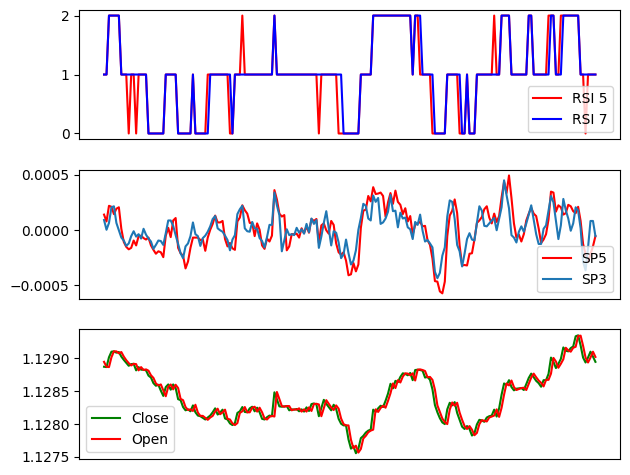

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

rango = 200

from_dt = np.array(df['from_dt'].iloc[-rango:])

rsi_5 = np.array(df['cat_rsi_5'].iloc[-rango:])
rsi_7 = np.array(df['cat_rsi_7'].iloc[-rango:])

sp5 = np.array(df['price_speed_5'].iloc[-rango:])
sp3 = np.array(df['price_speed_3'].iloc[-rango:])

volat = np.array(df['atr_5'].iloc[-rango:])

close = np.array(df['close'].iloc[-rango:])
open = np.array(df['open'].iloc[-rango:])


fig, ax = plt.subplots(3)

# Gráfico 1: RSI (2 líneas)
ax[0].plot(from_dt, rsi_5, color='r', label='RSI 5')  
ax[0].plot(from_dt, rsi_7, color='b', label='RSI 7')
ax[0].legend(loc='best')  # Leyenda para el primer subplot

# # Gráfico 2: Volatilidad (1 línea)
# ax[1].plot(from_dt, volat, label='Volatilidad')  
# ax[1].legend(loc='best')  # Leyenda para el segundo subplot

# Gráfico 3: SP5 y SP3 (2 líneas)
ax[1].plot(from_dt, sp5, color='r', label='SP5')  
ax[1].plot(from_dt, sp3, label='SP3')
ax[1].legend(loc='best')  # Leyenda para el tercer subplot

# Gráfico 4: Precios (open y close)
ax[2].plot(from_dt, close, color='g', label='Close')  
ax[2].plot(from_dt, open, color='r', label='Open')
ax[2].legend(loc='best')  # Leyenda para el cuarto subplot

# Ocultar etiquetas del eje X en todos los subplots
for axis in ax:
    axis.set_xticks([])  

plt.tight_layout()  # Ajusta el espaciado entre subplots
plt.show()

In [12]:
import pandas_ta as ta

df_data = df[['open','close','volume']].copy()
df_data['low'] = df['min']
df_data['high'] = df['max']

df_data = df_data.reset_index(drop=True)  # Elimina el índice actual y crea uno numérico


df_data.head(2)


,open,close,volume,low,high
0,1.135300,1.13530,105,1.13525,1.135320
1,1.135305,1.13515,131,1.13514,1.135315


In [36]:
bolinger = df_data.ta.bbands(append=True)  
bolinger.columns

Index(['BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0', 'BBB_5_2.0', 'BBP_5_2.0'], dtype='object')

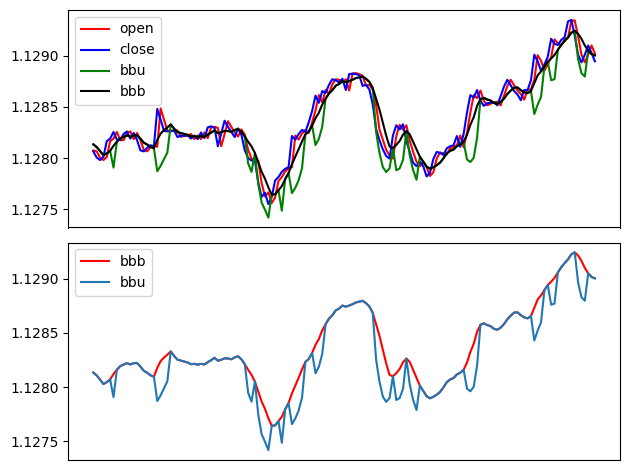

In [59]:
rango  = 150 

x = np.array(df_data.index)[-rango:]

open = np.array(df_data['open'].iloc[-rango:])
close = np.array(df_data['close'].iloc[-rango:])

bbb  = np.array(bolinger['BBM_5_2.0'].iloc[-rango:])
bbu = np.array(bolinger['BBL_5_2.0'].iloc[-rango:])


fig, ax = plt.subplots(2)

# Gráfico 1: RSI (2 líneas)
ax[0].plot(x, open, color='r', label='open')  
ax[0].plot(x, close, color='b', label='close')
ax[0].plot(x, bbu,color = 'green',label='bbu')
ax[0].plot(x, bbb, color='black', label='bbb')
ax[0].legend(loc='best')  # Leyenda para el primer subplot

# Gráfico 3: SP5 y SP3 (2 líneas)
ax[1].plot(x, bbb, color='r', label='bbb')  
ax[1].plot(x, bbu, label='bbu')
ax[1].legend(loc='best')  # Leyenda para el tercer subplot

# Ocultar etiquetas del eje X en todos los subplots
for axis in ax:
    axis.set_xticks([])  

plt.tight_layout()  # Ajusta el espaciado entre subplots
plt.show()

In [14]:

df_data.ta.bbands(append=True)       # Bandas de Bollinger


,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,1.135295,1.135295,1.135295,1.955832e-14,5.404320e+11
...,...,...,...,...,...
9968,1.128829,1.129165,1.129501,5.947716e-02,1.575318e-01
9969,1.128797,1.129100,1.129403,5.371520e-02,3.516072e-01
9970,1.129050,1.129050,1.129050,1.966650e-14,2.251800e+11
9971,1.129016,1.129016,1.129016,1.966709e-14,4.053240e+10


In [15]:
# Detectar patrones específicos (Hammer, Doji, Engulfing, etc.)
df_data.ta.cdl_pattern(name="doji", append=True)    # Doji


,CDL_DOJI_10_0.1
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9968,0.0
9969,0.0
9970,0.0
9971,0.0


In [21]:

# Para múltiples patrones:
df_data.ta.cdl_pattern(name=["doji", "engulfing", "morningstar"], append=True)

,CDL_DOJI_10_0.1,CDL_ENGULFING,CDL_MORNINGSTAR
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
9968,0.0,0.0,0.0
9969,0.0,0.0,0.0
9970,0.0,0.0,0.0
9971,0.0,0.0,0.0
